In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt               #for plotting and EDA
import seaborn as sns                         #for plotting and EDA
from sklearn.model_selection import cross_val_score                      #for cross validating model
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Importing and Reading our data from csv file 
from google.colab import files
df = files.upload()


Saving insurance_claims.csv to insurance_claims.csv


In [ ]:
# Reading the dataset from Colab Local Repository
df = pd.read_csv('insurance_claims.csv')
# shape, this gives the dimensions of the dataset
print('Dimensions of the dataset:',df.shape)


Dimensions of the dataset: (1000, 39)


In [ ]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


Exploratory Data Analysis (EDA):

In [ ]:
# Checking all column names
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [ ]:
# Checking the data types of all columns
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [ ]:
# Checking the info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
# Printing all the data type and their unique values
for column in df.columns:
    if df[column].dtype==object:
        print(df[column].value_counts())
        print('****************************************************')

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
****************************************************
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
****************************************************
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
****************************************************
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
****************************************************
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
****************************************************
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repa

In [ ]:
# Replacing '?' with No info
df=df.replace('?','No Info')

In [ ]:
# Printing all data type and their unique values
for column in df.columns:
    if df[column].dtype==object:
        print(df[column].value_counts())
        print('**************************************')

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
**************************************
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
**************************************
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
**************************************
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
**************************************
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
**************************************
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-hou

In [ ]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [ ]:
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

In [ ]:
df.loc[df['umbrella_limit']==-1000000]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
290,284,42,526039,04-05-1995,OH,100/300,500,1338.54,-1000000,438178,...,1,No Info,94160,8560,17120,68480,Chevrolet,Malibu,1996,N


In [ ]:
# Dropping this value one row
df.drop(df[df['umbrella_limit']==-1000000].index,inplace=True)

In [ ]:
# Dividing ['incident_date'] into three other columns
df['incident_Date']=df['incident_date'].str.split('-').str[0]
df['incident_Month']=df['incident_date'].str.split('-').str[1]
df['incident_Year']=df['incident_date'].str.split('-').str[2]

In [ ]:
# Dividing policy_bind_date into three other columns
df['policy_bind_Date']=df['policy_bind_date'].str.split('-').str[0]
df['policy_bind_Month']=df['policy_bind_date'].str.split('-').str[1]
df['policy_bind_Year']=df['policy_bind_date'].str.split('-').str[2]

In [ ]:
# Dropping policy_bind_date column
df.drop('policy_bind_date',axis=1,inplace=True)

In [ ]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,incident_Year,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,Saab,92x,2004,Y,25,01,2015,17,10,2014
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,Mercedes,E400,2007,Y,21,01,2015,27,06,2006
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,Dodge,RAM,2007,N,22,02,2015,06,09,2000
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,Chevrolet,Tahoe,2014,Y,10,01,2015,25,05,1990
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,Accura,RSX,2009,N,17,02,2015,06,06,2014


Dropping the policy_number and other useless columns as well

In [ ]:

df.drop(['policy_number','insured_zip','incident_location'],axis=1,inplace=True)
df.shape

(999, 41)

In [ ]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,incident_Year,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,Saab,92x,2004,Y,25,01,2015,17,10,2014
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,Mercedes,E400,2007,Y,21,01,2015,27,06,2006
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,Dodge,RAM,2007,N,22,02,2015,06,09,2000
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,Chevrolet,Tahoe,2014,Y,10,01,2015,25,05,1990
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,Accura,RSX,2009,N,17,02,2015,06,06,2014


In [ ]:
df['fraud_reported'].value_counts()

N    752
Y    247
Name: fraud_reported, dtype: int64

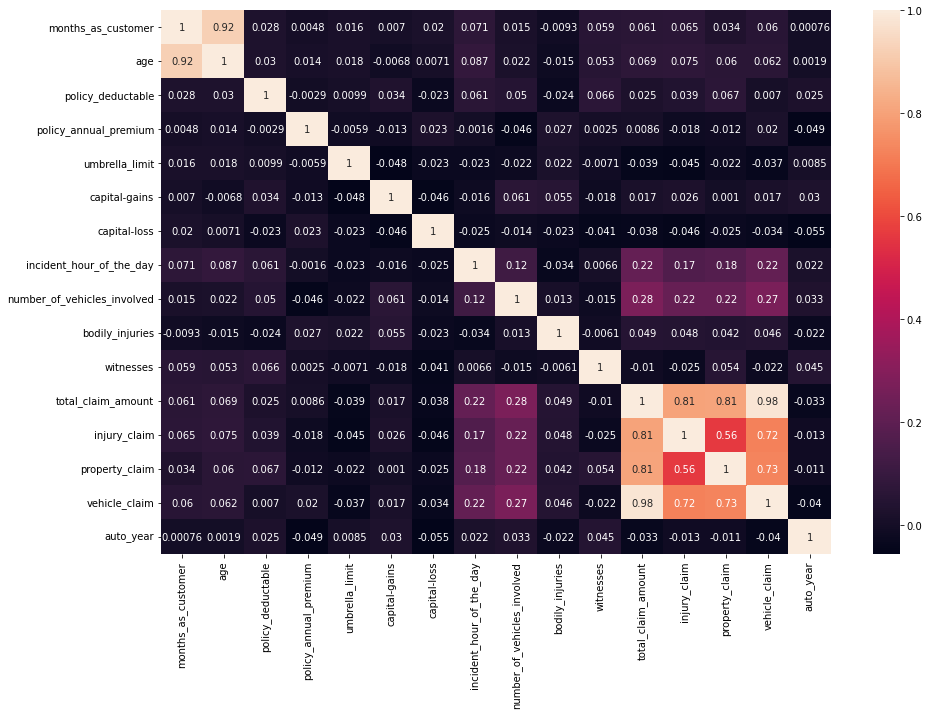

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)



fraud reported claim is higher in Saab, Mercedes, Dodge, Chevrolet, Audi, Ford, Suburu, BMW and Volkswagen auto_make In Other Auto_make brand is less than others.
Have done the analysis of all important features,some of features don't have much information to define it.
Skewness Handling:
skew and outliers will be handed in numerical columns only

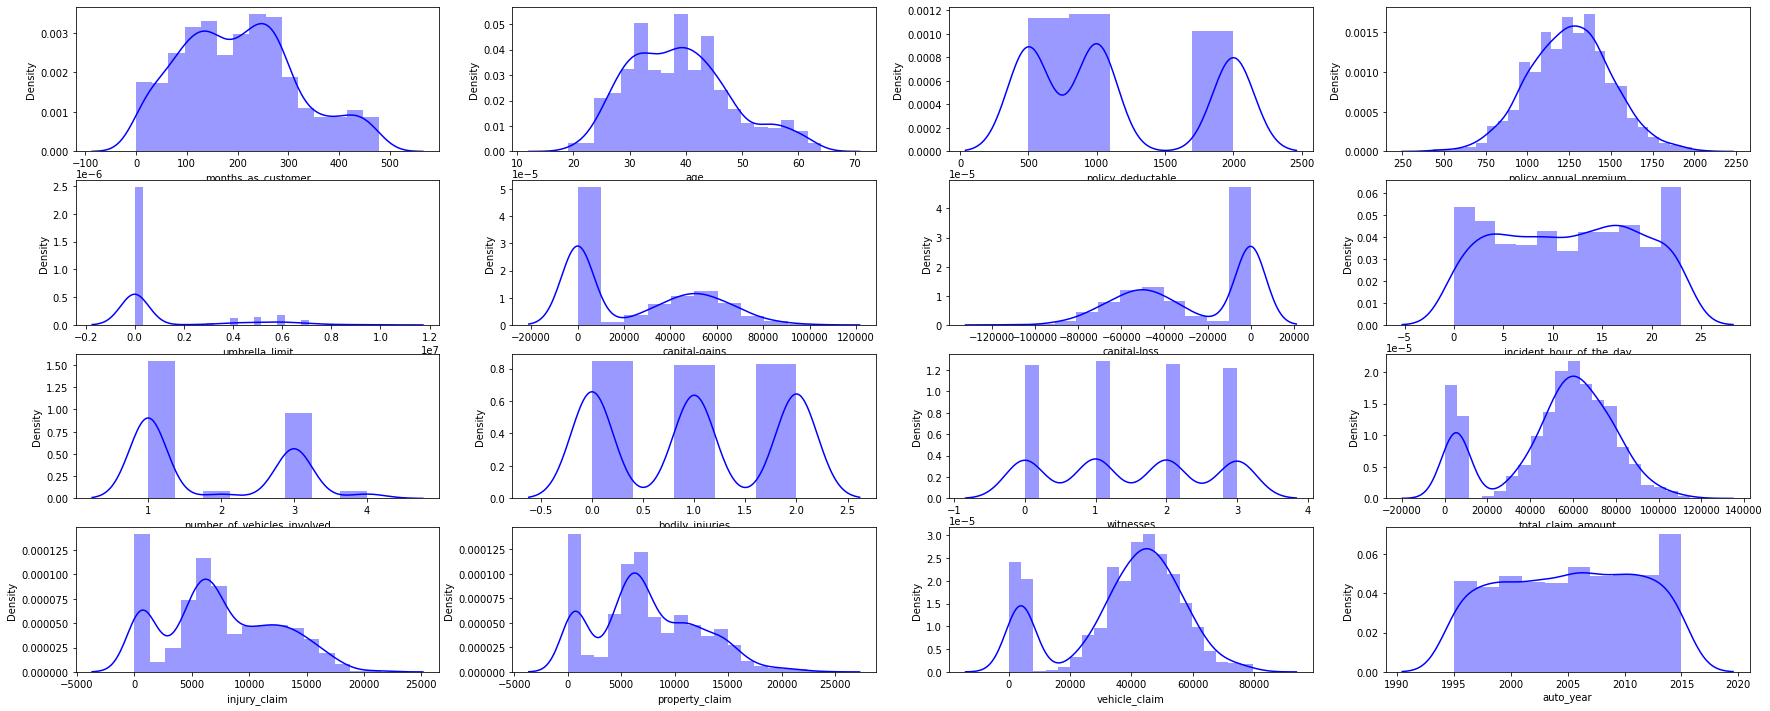

In [ ]:
# plotting for numerical columns only
plt.figure(figsize=(30,25))
for i in enumerate(df.select_dtypes(include=['int64', 'float', 'int32'])):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='blue')

In [ ]:
# selecting datatypes
df.select_dtypes(include=['int64', 'float','int32']).skew()

months_as_customer             0.364014
age                            0.479796
policy_deductable              0.476426
policy_annual_premium          0.005374
umbrella_limit                 1.806100
capital-gains                  0.477220
capital-loss                  -0.389813
incident_hour_of_the_day      -0.034990
number_of_vehicles_involved    0.501009
bodily_injuries                0.012940
witnesses                      0.018399
total_claim_amount            -0.595646
injury_claim                   0.265382
property_claim                 0.378121
vehicle_claim                 -0.622627
auto_year                     -0.049502
dtype: float64



    skewness more than+/- 0.5 will we treated

    object and target variable columns will not be treated

    we can see here most of the columns are skewed.

    It will only deal with numerical columns umbrella_limit, total_claim_amount, vehicle_claim.



In [ ]:
from sklearn.preprocessing import power_transform

df[['umbrella_limit','total_claim_amount','vehicle_claim']]=power_transform(
    df[['umbrella_limit','total_claim_amount','vehicle_claim']],method='yeo-johnson')

Outliers Handling:

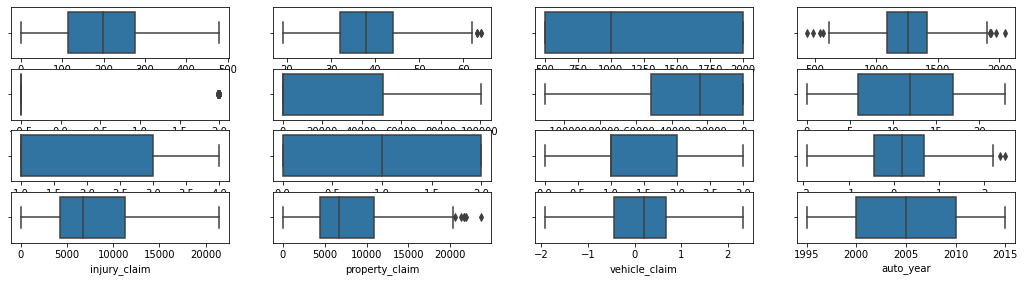

In [ ]:
plt.figure(figsize=(18,10))
for o in enumerate(df.select_dtypes(include=['int64', 'float', 'int32'])):
     plt.subplot(9,4,o[0]+1)
     sns.boxplot(df[o[1]])

only some of columns seems having outliers after skewness removed.
Outliers Removal:
zscore

In [ ]:
from scipy.stats import zscore

z=np.abs(zscore(df.select_dtypes(include=['int64', 'float','int32'])))

print(np.where(z>3))

(array([229, 248, 499, 762, 806]), array([ 3,  3, 13,  3,  6]))


In [ ]:
# getting outliers after removing outliers with new data frame for removing
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (999, 41)
After removing outliers:: (994, 41)


IQR

In [ ]:
# using IQR method

from scipy import stats
IQR = stats.iqr(df.select_dtypes(include=['int64', 'float','int32'])) 
IQR

1230.8691969059628

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out = df.select_dtypes(include=['int64', 'float','int32'])[~((df.select_dtypes(include=['int64', 'float','int32']) < (Q1 - 1.5 * IQR)) |(df.select_dtypes(include=['int64', 'float','int32']) > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(313, 16)


Choosing ZScore because there is huge data loss in IQR.

In [ ]:
df=df_1

Using LabelEncoder for convering categorical to numerical`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           994 non-null    int64  
 1   age                          994 non-null    int64  
 2   policy_state                 994 non-null    object 
 3   policy_csl                   994 non-null    object 
 4   policy_deductable            994 non-null    int64  
 5   policy_annual_premium        994 non-null    float64
 6   umbrella_limit               994 non-null    float64
 7   insured_sex                  994 non-null    object 
 8   insured_education_level      994 non-null    object 
 9   insured_occupation           994 non-null    object 
 10  insured_hobbies              994 non-null    object 
 11  insured_relationship         994 non-null    object 
 12  capital-gains                994 non-null    int64  
 13  capital-loss        

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Encoding object columns into Numeric Values in df
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categ_data = df.select_dtypes(exclude=['int64', 'float','int32'])
for val in categ_data:
    df[val]=le.fit_transform(df[val].astype(str))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           994 non-null    int64  
 1   age                          994 non-null    int64  
 2   policy_state                 994 non-null    int64  
 3   policy_csl                   994 non-null    int64  
 4   policy_deductable            994 non-null    int64  
 5   policy_annual_premium        994 non-null    float64
 6   umbrella_limit               994 non-null    float64
 7   insured_sex                  994 non-null    int64  
 8   insured_education_level      994 non-null    int64  
 9   insured_occupation           994 non-null    int64  
 10  insured_hobbies              994 non-null    int64  
 11  insured_relationship         994 non-null    int64  
 12  capital-gains                994 non-null    int64  
 13  capital-loss        

Dividing data into X and Y

In [ ]:
x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']

In [ ]:
x.shape

(994, 40)

In [ ]:

y.shape

(994,)

Scaling X values:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)

In [ ]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
dtype: int64

In [ ]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,...,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.0,994.000000,994.000000,994.000000
mean,0.426698,0.443975,0.507042,0.474849,0.424883,0.502476,0.201896,0.463783,0.494634,0.512692,...,0.452576,0.504179,0.508790,0.505785,0.467270,0.248994,0.0,0.480751,0.506585,0.463380
std,0.240313,0.203319,0.415523,0.402499,0.408046,0.168078,0.401223,0.498938,0.324961,0.309271,...,0.235036,0.310061,0.293301,0.300326,0.288265,0.261924,0.0,0.293300,0.318378,0.294742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.242171,0.288889,0.000000,0.000000,0.000000,0.385783,0.000000,0.000000,0.166667,0.230769,...,0.349015,0.230769,0.263158,0.250000,0.233333,0.000000,0.0,0.233333,0.181818,0.200000
50%,0.417537,0.422222,0.500000,0.500000,0.333333,0.502305,0.000000,0.000000,0.500000,0.538462,...,0.499869,0.538462,0.526316,0.500000,0.466667,0.000000,0.0,0.483333,0.545455,0.480000
75%,0.577766,0.572222,1.000000,1.000000,1.000000,0.613049,0.000000,1.000000,0.833333,0.769231,...,0.612979,0.769231,0.763158,0.750000,0.700000,0.500000,0.0,0.733333,0.818182,0.720000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


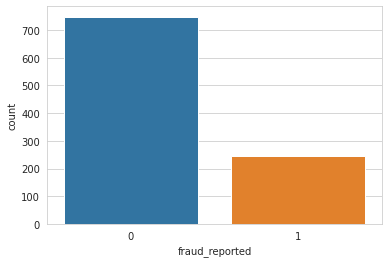

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x="fraud_reported", data=df)

Total data would be scalled using
Imbalanced learn
Using OverSampling_Borderline *SMOTE*

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
x_rus, y_rus =BorderlineSMOTE().fit_resample(x, y)
print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (994,)
Resample Target dataset shape (1496,)


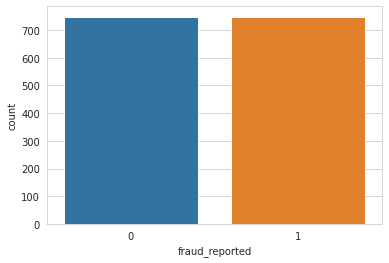

In [ ]:
sns.set_style("whitegrid")
sns.countplot(y_rus)

Now we have balanced data for model training
Spliting Train and Test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.27,random_state=42)

In [ ]:
x_train.shape

(1092, 40)

In [ ]:
y_train.shape
x_test.shape
y_test.shape

(404,)

MODEL BUILDING:

In [ ]:
# importing necessary libraries
    
from sklearn.linear_model import LogisticRegression             #classification model
from sklearn.svm import SVC                                     #classification model
from sklearn.tree import DecisionTreeClassifier                 #classification model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split            #for splitting dataset into training and testing
from sklearn.metrics import accuracy_score                      #for checking model accuracy
from sklearn.metrics import roc_auc_score                       #for checking model accuracy
from sklearn.metrics import confusion_matrix, classification_report      #for checking model accuracy
from sklearn.ensemble import RandomForestClassifier             #classification model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

LogisticRegression

In [ ]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

cross validation score: 0.7386532887402453


In [ ]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.6905940594059405
[[126  60]
 [ 65 153]]
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       186
           1       0.72      0.70      0.71       218

    accuracy                           0.69       404
   macro avg       0.69      0.69      0.69       404
weighted avg       0.69      0.69      0.69       404

Training accuracy:: 0.7582417582417582
Test accuracy:: 0.6905940594059405


KNeighborsClassifier

In [ ]:
# getting to know the validation score
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.6597770345596432


In [ ]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.6831683168316832
[[ 68 118]
 [ 10 208]]
              precision    recall  f1-score   support

           0       0.87      0.37      0.52       186
           1       0.64      0.95      0.76       218

    accuracy                           0.68       404
   macro avg       0.75      0.66      0.64       404
weighted avg       0.75      0.68      0.65       404

Training accuracy:: 0.7362637362637363
Test accuracy:: 0.6831683168316832


RandomForestClassifier

In [ ]:
# getting to know the score of RFC cross validation score
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8777725752508362


In [ ]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.8564356435643564
[[160  26]
 [ 32 186]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       186
           1       0.88      0.85      0.87       218

    accuracy                           0.86       404
   macro avg       0.86      0.86      0.86       404
weighted avg       0.86      0.86      0.86       404

Training accuracy:: 1.0
Test accuracy:: 0.8564356435643564



ENSEMBLE TECHNIQUES:
1.ADA BOOST CLASSIFIER

In [ ]:
# using ADA boost classifier
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.8578076062639821


In [ ]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.849009900990099
[[159  27]
 [ 34 184]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       186
           1       0.87      0.84      0.86       218

    accuracy                           0.85       404
   macro avg       0.85      0.85      0.85       404
weighted avg       0.85      0.85      0.85       404

Training accuracy:: 0.9084249084249084
Test accuracy:: 0.849009900990099


2.Bagging Classifier:

In [ ]:
# using Bagging classifier
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

cross validation score for BAGGING Classifier: 0.8637807606263982


In [ ]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.849009900990099
[[156  30]
 [ 31 187]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       186
           1       0.86      0.86      0.86       218

    accuracy                           0.85       404
   macro avg       0.85      0.85      0.85       404
weighted avg       0.85      0.85      0.85       404

Training accuracy:: 0.9926739926739927
Test accuracy:: 0.849009900990099


3.Gradient Boosting classifier:

In [ ]:
# using Gradient Boosting Classifier
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.8898434004474274


In [ ]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.8861386138613861
[[157  29]
 [ 17 201]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       186
           1       0.87      0.92      0.90       218

    accuracy                           0.89       404
   macro avg       0.89      0.88      0.88       404
weighted avg       0.89      0.89      0.89       404

Training accuracy:: 0.9743589743589743
Test accuracy:: 0.8861386138613861




GradientBoostingClassifier as final model

for HYPER PARAMETER TUNING because both train and test accuracies are pretty close and highest as well.
HYPER PARAMETER TUNING:
GradientBoostingClassifier

In [ ]:
adb=GradientBoostingClassifier()
param_grid={
    'criterion' : ['mse', 'mae'],
    'n_estimators':[100,200],
    'learning_rate':[0.1,0.5,1.0],
     'random_state':[5]              
}

In [ ]:
adb_grid=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=1)

In [ ]:
# Accuracy after parameter tuning
adb_grid.fit(x_train,y_train)
adb_pred=adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,adb_pred))

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Accuracy after parameter tuning:: 0.8539603960396039


In [ ]:
adb_grid.best_params_

{'criterion': 'mse',
 'learning_rate': 1.0,
 'n_estimators': 100,
 'random_state': 5}

model training with best parameters

In [ ]:
best_param={
    'criterion' : ['mse'],
    'n_estimators':[100],
    'learning_rate':[0.5],
     'random_state':[5]   
}

In [ ]:
best_adb_grid=GridSearchCV(GradientBoostingClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [ ]:
best_adb_grid.fit(x_train,y_train)
best_adb_pred=best_adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_adb_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.8836633663366337


As we notice after HYPER PARAMETER TUNING models accuracy score got increased.
Report of GradientBoostingClassifier:

In [ ]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_adb_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       186
           1       0.88      0.91      0.89       218

    accuracy                           0.88       404
   macro avg       0.88      0.88      0.88       404
weighted avg       0.88      0.88      0.88       404



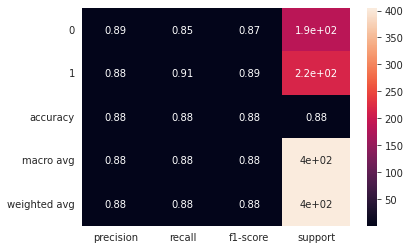

In [ ]:
clsf_repo = classification_report(y_test,best_adb_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
print("roc auc score::",roc_auc_score(y_test, best_adb_pred))

roc auc score:: 0.8811532011443227


In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr1, tpr1, thresh1 = roc_curve(y_test, best_adb_pred, pos_label=1)

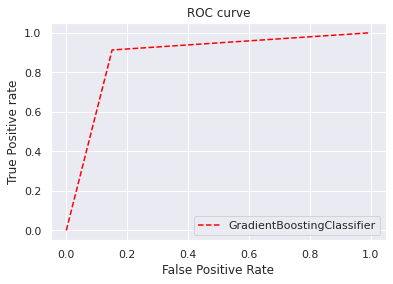

In [ ]:
#plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='GradientBoostingClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')